#Clusterin

Agrupamento 
A uma divisão randomicamente - ramificar grupos por centroides 

##Separação por grupos

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pylab import rcParams
rcParams ['figure.figsize'] = (16,8)

In [3]:
dataset = pd.read_csv('https://s3.amazonaws.com/pycourse/Mall_Customers.csv')
dataset.head()

#Traçar perfil do consumidor em um shoopping

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
X = dataset.iloc[:,[3,4]].values

Text(0, 0.5, 'Escala de gastos (1-100)')

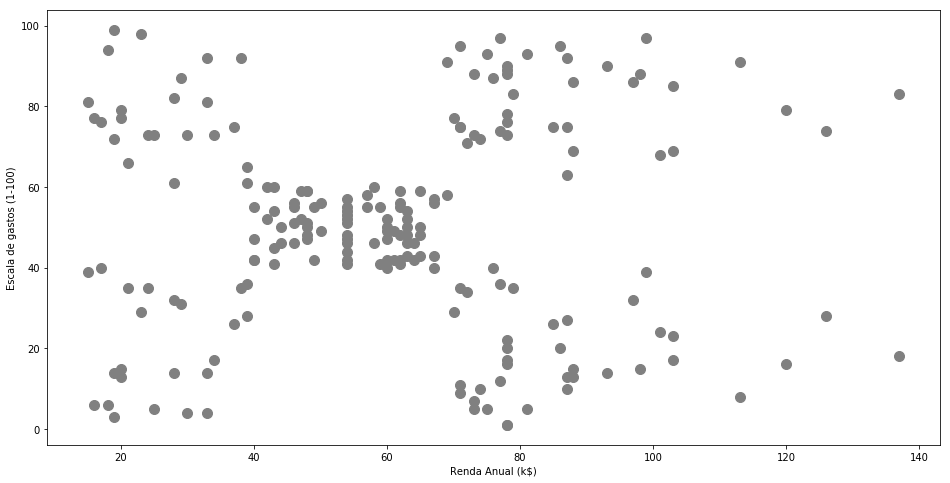

In [8]:
plt.scatter(X[:,0],X[:,1], s=100, c = 'gray', label ='Cluster 1')
plt.xlabel ('Renda Anual (k$)')
plt.ylabel ('Escala de gastos (1-100)')

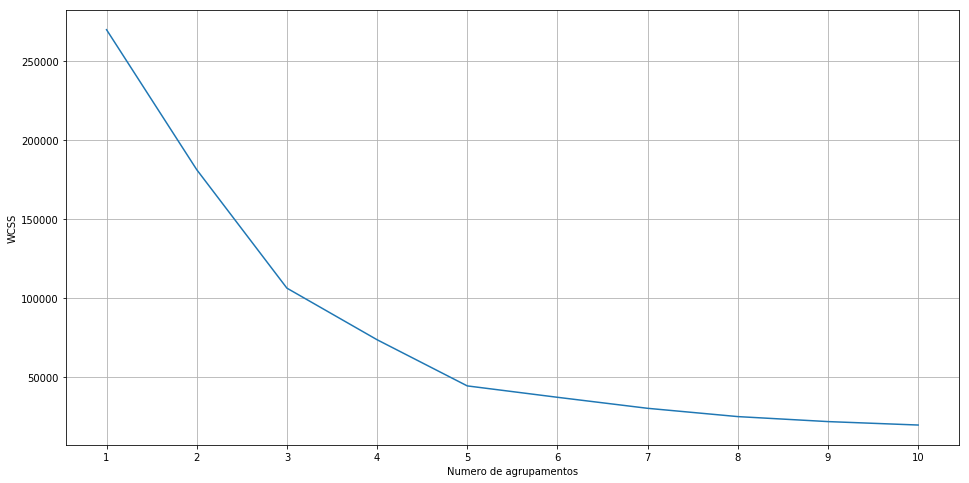

In [12]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
  kmeans = KMeans(n_clusters = i, init ='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel('Numero de agrupamentos')
plt.ylabel('WCSS')
plt.grid()

In [0]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [17]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [25]:
X[y_kmeans == 0, 0]

array([39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46,
       47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60,
       60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64,
       64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 71, 72, 76])

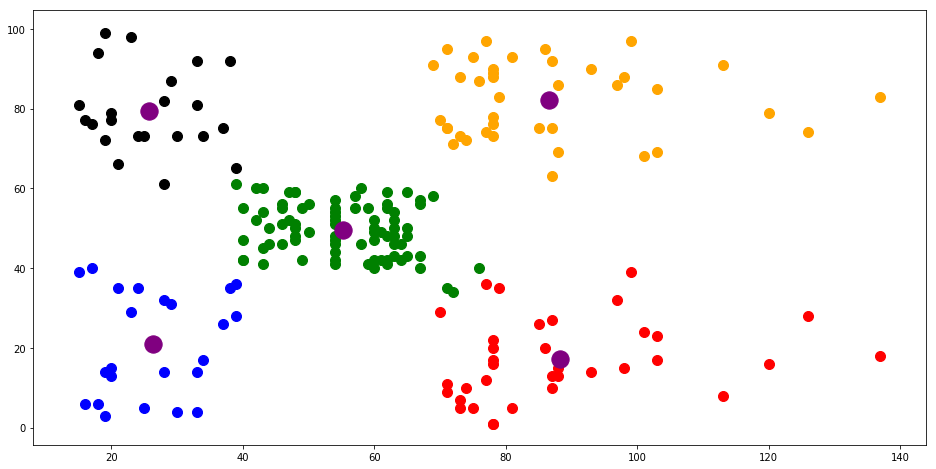

In [56]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c = 'green', label ='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c = 'red', label ='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c = 'blue', label ='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c = 'black', label ='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c = 'orange', label ='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c='purple', label = 'Centroid' ) 

#Processamento de imagens

In [0]:
import cv2
import matplotlib.image as mpimg


In [58]:
!wget https://s3.amazonaws.com/pycourse/ferro.jpg

--2019-07-17 15:35:00--  https://s3.amazonaws.com/pycourse/ferro.jpg
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.8.125
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.8.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211162 (206K) [image/jpeg]
Saving to: ‘ferro.jpg’

ferro.jpg           100%[===================>] 206.21K  1.09MB/s    in 0.2s    

2019-07-17 15:35:00 (1.09 MB/s) - ‘ferro.jpg’ saved [211162/211162]



In [59]:
!ls

ferro.jpg  sample_data


In [0]:
img = mpimg.imread('ferro.jpg')

In [0]:
Z = img.reshape((-1,3))

In [70]:
Z

array([[17, 15, 16],
       [18, 16, 17],
       [17, 16, 14],
       ...,
       [16, 12, 11],
       [18, 12, 12],
       [21, 15, 15]], dtype=uint8)

In [0]:
Z = np.float32(Z)

In [72]:
Z

array([[17., 15., 16.],
       [18., 16., 17.],
       [17., 16., 14.],
       ...,
       [16., 12., 11.],
       [18., 12., 12.],
       [21., 15., 15.]], dtype=float32)

In [0]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [0]:
K = 10


In [0]:
ret, label, center = cv2.kmeans(Z,K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [88]:
label

array([[4],
       [4],
       [4],
       ...,
       [4],
       [4],
       [4]], dtype=int32)

In [89]:
center

array([[216.37877 , 165.60323 , 146.59354 ],
       [ 55.754734,  42.125835,  41.27983 ],
       [ 95.964714,  71.93748 ,  67.68793 ],
       [243.27805 , 197.42673 , 173.50964 ],
       [ 25.04666 ,  18.762867,  19.137558],
       [198.98419 , 135.52106 , 117.65039 ],
       [251.65813 , 241.93819 , 219.39813 ],
       [167.80798 , 146.48615 , 136.15494 ],
       [154.18709 , 119.69185 , 108.39266 ],
       [124.91553 , 101.82907 ,  95.01416 ]], dtype=float32)

In [0]:
center = np.uint8(center)

In [91]:
label.flatten()

array([4, 4, 4, ..., 4, 4, 4], dtype=int32)

In [0]:
res = center[label.flatten()]
res2 = res.reshape(img.shape)

<Figure size 1152x576 with 0 Axes>

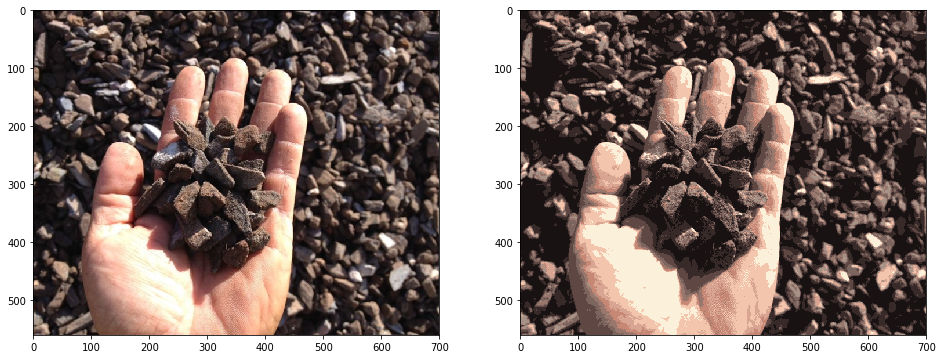

In [93]:
plt.figure()
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.imshow(img)
ax2.imshow(res2)